**2023-11-13**<p>
**This script serves for the EUI research**<p>
**This script purpose is the same as <cal_Indian_rainfall_mask_other_region_GPCC_231113.ipynb>, except this rainfall is from CESM simulation**

In [1]:
from matplotlib import projections
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import sys
import cartopy
import geopandas
import rioxarray
from shapely.geometry import mapping

module_path = '/Users/sunweihao/local-code/module'
sys.path.append(module_path)
from module_sun import mask_use_shapefile

<font color=red>1. Process the data</font>

In [2]:
data_path = '/Volumes/samssd/data/precipitation/CESM/'
data_name = ['BTAL_precipitation_jjas_mean_231113.nc', 'noEU_precipitation_jjas_mean_231113.nc']

shp_path = '/Volumes/samssd/data/shape/indian/'
shp_name = 'IND_adm0.shp'

# Mask the data out of the bound
f0       = xr.open_dataset(data_path + data_name[0])
f1       = xr.open_dataset(data_path + data_name[1])

prect_con = mask_use_shapefile(f0, "lat", "lon", shp_path + shp_name)
prect_neu = mask_use_shapefile(f1, "lat", "lon", shp_path + shp_name)

#print(prect_con) # (150, 96, 144)
# 4. Give the axis information to the output
ncfile  =  xr.Dataset(
{
    "JJAS_precip_con": (["time", "lat", "lon"], prect_con['PRECT_JJAS'].data),
    "JJAS_precip_neu": (["time", "lat", "lon"], prect_neu['PRECT_JJAS'].data),
},
coords={
    "time": (["time"], np.linspace(1850, 1850 + 156, 157)),
    "lat":  (["lat"],  f0['lat'].data),
    "lon":  (["lon"],  f0['lon'].data),
},
)

<font color=red>2. Whole Indian mean and trend</font>

In [3]:
ncfile1 = ncfile.sel(time=slice(1891, 2006))
whole_precip_con  =  np.zeros((116))
whole_precip_neu  =  np.zeros((116))
for yyyy in range(116):
    whole_precip_con[yyyy] = np.nanmean(ncfile1['JJAS_precip_con'].data[yyyy])
    whole_precip_neu[yyyy] = np.nanmean(ncfile1['JJAS_precip_neu'].data[yyyy])

<font color=red>3. Paint the trend of the whole Indian precipitation</font>

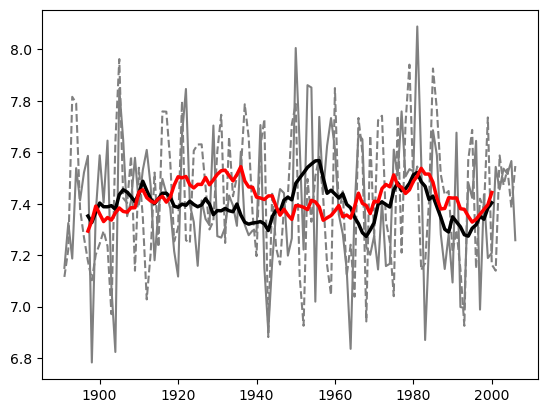

In [4]:
def cal_moving_average(x, w):
        return np.convolve(x, np.ones(w), "valid") / w

w = 13
whole_precip_move_con = cal_moving_average(whole_precip_con, w)
whole_precip_move_neu = cal_moving_average(whole_precip_neu, w)
#print(whole_precip_move.shape) # 117 points

fig, ax = plt.subplots()
ax.plot(ncfile1['time'].data, whole_precip_con, color='grey', linewidth=1.5)
ax.plot(ncfile1['time'].data, whole_precip_neu, color='grey', linestyle='--', linewidth=1.5)
time_process = np.linspace(1891 + (w-1)/2, 2006 - (w-1)/2, 116 - (w-1))
ax.plot(time_process, whole_precip_move_con, color='black', linewidth=2.5)
ax.plot(time_process, whole_precip_move_neu, color='red', linewidth=2.5)


plt.savefig("/Volumes/samssd/paint/EUI_CESM_whole_Indian_rainfall_trend_JJAS_moving13.png", dpi=700)

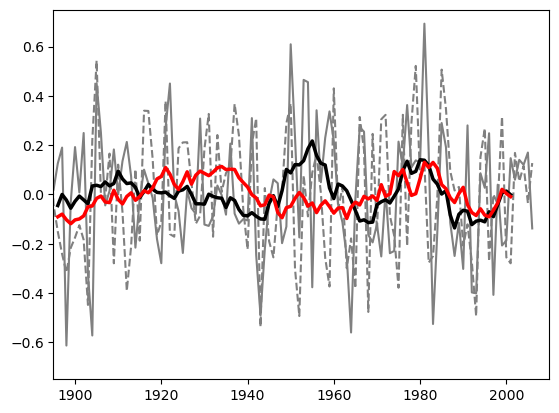

In [7]:
def cal_moving_average(x, w):
        return np.convolve(x, np.ones(w), "valid") / w

w = 11
whole_precip_move_con = cal_moving_average(whole_precip_con - np.average(whole_precip_con), w)
whole_precip_move_neu = cal_moving_average(whole_precip_neu - np.average(whole_precip_neu), w)
#print(whole_precip_move.shape) # 117 points

fig, ax = plt.subplots()

ax.set_ylim((-0.75, 0.75))
ax.set_xlim((1895, 2010))

ax.plot(ncfile1['time'].data, whole_precip_con - np.average(whole_precip_con), color='grey', linewidth=1.5)
ax.plot(ncfile1['time'].data, whole_precip_neu - np.average(whole_precip_neu), color='grey', linestyle='--', linewidth=1.5)
time_process = np.linspace(1891 + (w-1)/2, 2006 - (w-1)/2, 116 - (w-1))
ax.plot(time_process, whole_precip_move_con, color='black', linewidth=2.5)
ax.plot(time_process, whole_precip_move_neu, color='red', linewidth=2.5)


plt.savefig("/Volumes/samssd/paint/EUI_CESM_whole_Indian_rainfall_trend_JJAS_moving11.png", dpi=700)

# 2. Calculate deviation and trend

In [11]:
end    =  69
print(ncfile)

time1  =  ncfile['time'].data[:end]
print(con_precip_prefactural[:end].shape)
z1     =  np.polyfit(time1, con_precip_prefactural[:end], 1)


fig, ax = plt.subplots()

ax.set_ylim((-0.75, 0.75))
ax.set_xlim((1895, 2010))

ax.plot(ncfile['time'].data, whole_precip_con - np.average(whole_precip_con), color='grey', linewidth=1.5)
#ax.plot(ncfile['time'].data, whole_precip_neu - np.average(whole_precip_neu), color='grey', linestyle='--', linewidth=1.5)
time_process = np.linspace(1891 + (w-1)/2, 2006 - (w-1)/2, 116 - (w-1))
ax.plot(time_process, whole_precip_move_con, color='black', linewidth=2.5)
#ax.plot(time_process, whole_precip_move_neu, color='red', linewidth=2.5)


plt.savefig("/Volumes/samssd/paint/EUI_CESM_whole_Indian_rainfall_trend_JJAS_moving11.png", dpi=700)

<xarray.Dataset>
Dimensions:          (time: 116, lat: 96, lon: 144)
Coordinates:
  * time             (time) float64 1.891e+03 1.892e+03 ... 2.005e+03 2.006e+03
  * lat              (lat) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon              (lon) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
Data variables:
    JJAS_precip_con  (time, lat, lon) float64 nan nan nan nan ... nan nan nan
    JJAS_precip_neu  (time, lat, lon) float64 nan nan nan nan ... nan nan nan
(60,)


TypeError: expected x and y to have same length

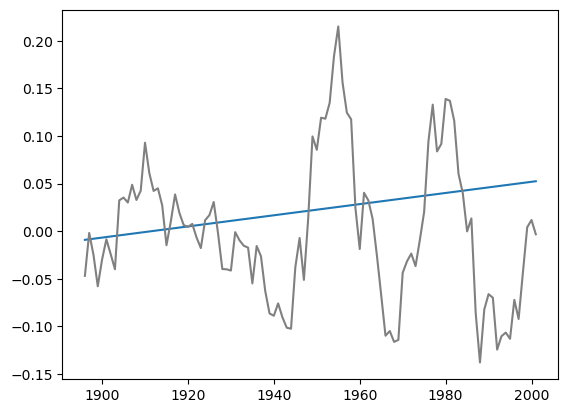

In [15]:
import pymannkendall as mk

ncfile  =  ncfile.sel(time=slice(1891, 2006))
start = 5
end   = 68
whole_precip_con_deviation = whole_precip_con - np.average(whole_precip_con)
whole_precip_neu_deviation = whole_precip_neu - np.average(whole_precip_neu)

con_precip_prefactural     = whole_precip_con_deviation[start:end].copy()
#con_precip_factural        = whole_precip_neu_deviation[69:]

#test1  =  mk.original_test(con_precip_prefactural, alpha=0.1)
#test2  =  mk.original_test(con_precip_factural, alpha=0.1)

#for j in range(50, 80):
#    test1  =  mk.original_test(whole_precip_con_deviation[16:j], alpha=0.1)
#    print(test1)
z1     =  np.polyfit(time_process[:60], whole_precip_move_con[:60], 1)
p1     =  np.poly1d(z1)

fit    =  p1(time_process)
plt.plot(time_process, fit)
plt.plot(time_process, whole_precip_move_con - np.average(whole_precip_move_con), color='grey', linewidth=1.5)

In [ ]:
fig, ax = plt.subplots()

ax.set_ylim((-1.5, 1.5))
ax.set_xlim((1895, 2010))

ax.plot([1895, 2010], [0, 0], 'g--')
ax.plot(ncfile.sel(time=slice(1891, 2006)).time.data, whole_precip_con_deviation, color='grey', linewidth=1.5)

In [7]:
fig, ax = plt.subplots()

ax.set_ylim((-1.5, 1.5))
ax.set_xlim((1895, 2010))

ax.plot([1895, 2010], [0, 0], 'g--')
ax.plot(ncfile['time'].data[:-13], whole_precip/31 - np.average(whole_precip/31), color='grey', linewidth=1.5)

#ax.plot(time2, whole_precip_prefactual, color='grey', linewidth=1.5)

ax.plot(time1, p1(time1), color='red', linewidth=2)
ax.plot(time2, p2(time2), color='orange', linewidth=2)

#print(whole_precip_prefactual)
#test1
plt.savefig("/Volumes/samssd/paint/EUI_GPCC_whole_Indian_rainfall_trend_JJAS_99percent.png", dpi=700)

array([-0.05698446, -0.00945628,  0.27226819, -0.40526487,  0.023493  ,
       -0.17061636,  0.1664466 ,  0.34304026,  0.46417041,  0.13865154,
       -0.30136258, -0.24765432, -0.13268951,  0.23271898,  0.2064916 ,
        0.09204725, -0.13894428, -0.10798617,  0.26946266, -0.56982316,
       -0.32077598,  0.14091359,  0.0499918 ,  0.31412031, -0.09573595,
       -0.34705133, -0.26770307, -0.09318622, -0.23136184,  0.12020601,
       -0.00476781,  0.10350739,  0.16795136, -0.63536868, -0.0536997 ,
        0.17009349, -0.01397097,  0.2272495 , -0.34547523, -0.5945433 ,
        0.42901748,  0.22887941, -0.06663992, -0.00746973,  0.16049472,
       -0.02148033,  0.1128759 ,  0.19104456,  0.05162153, -0.23796627,
       -0.04037397,  0.07842348,  0.02232668, -0.03648643, -0.20307385,
       -0.30124639,  0.25003863,  0.42806222, -0.02171963, -0.08939121,
       -0.25960235, -0.00577287, -0.07759104, -0.10089266,  0.2858075 ,
       -0.14429511, -0.1498548 , -0.11010127,  0.01402062, -0.02